In [1]:
#please read all the comments, the code is ruunnable 

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('crude oil dataset/Brent 6monthly2017.xlsx')

In [4]:

#for mlp:comment the next line
x = np.array(df.t)

y = df.real
y = y.dropna()
y = np.array(y)
x1 = x
y1 = y

#specify the number of tests-1 here (if it is 3, type 2)
num = 2

n_test = len(x) - num - 5
xtrain = x[:n_test]
ytrain = y[:n_test]
xtest = x[n_test+5:]
ytest = y[n_test+5:]

xtrain1 = x1[:n_test]
ytrain1 = y1[:n_test]
xtest1 = x1[n_test+4:]
ytest1 = y1[n_test+4:]


#for mlp: comment the next four lines
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

xtrain1 = xtrain1.reshape(-1,1)
xtest1 = xtest1.reshape(-1,1)


In [5]:
def findthebestdataset(xtrain,ytrain,xtest,ytest,break1=-1):    
    mae = []
    rmse = []
    y_pred1 = []
    j=0
    for i in range(0,int((len(x)-num-5)/3)-1):
        for j in range(3):
    #for mlp: comment the next two lines and decomment the lines 11-18
            xtrain = np.delete(xtrain, 0)
            ytrain = np.delete(ytrain, 0)
    #        xtrain = xtrain.drop(j);
    #        j += 1 
    #        xtrain = xtrain.drop(j);
    #        j += 1
    #        xtrain = xtrain.drop(j);
    #        j += 1
    #        ytrain = np.delete(ytrain, 0)
    #        ytrain = np.delete(ytrain, 0)
        xtrain = xtrain.reshape(-1,1)
        model = LinearRegression()
        model.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)
        mae.append(mean_absolute_error(ytest,y_pred))
        rmse.append(np.sqrt(mean_squared_error(ytest,y_pred)))
#        print("the ith time: ",i,"\nMAE is: ",format(mean_absolute_error(ytest,y_pred),".3f"))#
#        print("RMSE is: ",format(np.sqrt(mean_squared_error(ytest,y_pred)),".3f"))
        if (i==break1 and break1 != -1):
                break;
    return mae, rmse, y_pred    

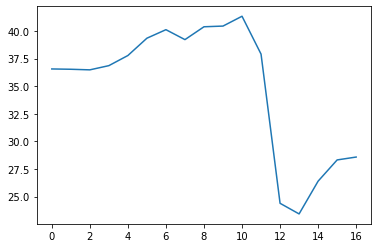

In [6]:
mae, rmse, dummy = findthebestdataset(xtrain,ytrain,xtest,ytest)
np.argmin(rmse)

x_axis = list(range(0,int((len(x)-num-5)/3)-1))
y_axis = rmse
plt.plot(x_axis,y_axis)
plt.show()
mae1, rmse1, y_pred = findthebestdataset(xtrain1,ytrain1,xtest1,ytest1,np.argmin(rmse))

In [7]:
print("MAE and RMSE are:",mae1[np.argmin(rmse)],rmse1[np.argmin(rmse)])

MAE and RMSE are: 19.601867781698203 20.42722269122471
